In [1]:
import numpy as np
import os
import os.path as path
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Wedge, Polygon, Ellipse, Rectangle
from matplotlib.collections import PatchCollection
import pandas as pd
import itertools as it
import pickle
import cv2
import io


In [119]:
from importlib import reload
import util
from util import *
reload(util)
from util import *

# load_data

In [61]:
data_root = r'E:\Projects\TreasureHunter\data'
files = [f[:-4] for f in os.listdir(path.join(data_root, 'map'))]

In [4]:
dumped_samples = path.join(data_root, 'temp', 'samples_dict.pkl')

if path.isfile(dumped_samples):
    with open(dumped_samples, 'rb') as f:
        samples = pickle.load(f)
else:       
    samples = {fn:pipeline1(fn, data_root) for fn in files}
    #np.random.shuffle(samples)
    with open(dumped_samples, 'wb') as f:
        pickle.dump(samples, f)

In [120]:
dumped_df = path.join(data_root, 'temp', 'df_with_matched.pkl')
pairs = list(it.combinations(range(len(samples)), 2))

if path.isfile(dumped_df):
    with open(dumped_df, 'rb') as f:
        df = pickle.load(f)
else:       
    df = debug_process(pairs, samples)
    df['norm_avg_std'] = np.linalg.norm(np.stack([df['norm_diff_avg'], df['norm_diff_std']], axis=1), axis=1)
    
    with open(dumped_df, 'wb') as f:
        pickle.dump(df, f)

125000 X51006350750 X51007339164 0:00:00.002999
130000 X51006388066 X51006556732 0:00:00.002997
135000 X51006401723 X51006619343 0:00:00.004001
140000 X51006414631 X51008145505 0:00:00.001999
145000 X51006414718 X51006620187 0:00:00.004001
150000 X51006502533 X51007135037 0:00:00.004001
155000 X51006556726 X51007339097 0:00:00.005002
160000 X51006557117 X51007339653 0:00:00.004003
165000 X51006619342 X51006619550 0:00:00.004003
170000 X51006619862 X51006913007 0:00:00.001998
175000 X51006882603 X51007339167 0:00:00.004999
180000 X51007103688 X51008114281 0:00:00.001989
185000 X51007339113 X51008123451 0:00:00.005005
190000 X51007843145 X51008099083 0:00:00.002001
195000 X51008123599 X51008142030 0:00:00.004012
process done: 195625
elapse: 2:16:33.349914
avg time per pair: 0:00:00.041883


In [121]:
df

,sp1_idx,sp2_idx,sp1_matched,sp2_matched,n_matched,n_shared_kw,n_kw_occur_sp1,n_kw_occur_sp2,norm_diff_avg,norm_diff_std,norm_avg_std
0,X00016469612,X00016469619,"[63, 54, 17, 50, 23, 51, 62, 29, 31, 52, 12, 1...","[58, 61, 13, 50, 18, 52, 57, 25, 41, 59, 7, 10...",31,27,34,43,0.166634,0.115720,0.202874
1,X00016469612,X00016469620,"[45, 54, 26, 50, 23, 51, 47, 12, 16, 20, 33, 3...","[53, 66, 58, 74, 64, 60, 4, 16, 7, 73, 48, 51,...",20,16,22,22,0.315675,0.205239,0.376529
2,X00016469612,X00016469622,"[32, 54, 17, 26, 50, 23, 51, 28, 21, 52, 12, 1...","[29, 64, 9, 16, 50, 20, 51, 55, 19, 62, 6, 8, ...",25,21,27,29,0.154826,0.135502,0.205748
3,X00016469612,X00016469623,"[45, 54, 26, 50, 23, 51, 47, 12, 20, 33, 34, 3...","[60, 73, 65, 81, 71, 67, 4, 16, 80, 55, 58, 61...",19,15,20,22,0.320045,0.214769,0.385428
4,X00016469612,X00016469669,"[63, 32, 54, 17, 27, 26, 50, 23, 51, 62, 21, 5...","[42, 23, 35, 13, 16, 15, 30, 19, 32, 41, 17, 3...",29,25,32,30,0.122434,0.117931,0.169994
...,...,...,...,...,...,...,...,...,...,...,...
195620,X51008164998,X51009453801,"[69, 60, 26, 68, 25, 17, 48, 52, 58, 21, 44, 1...","[63, 54, 25, 62, 24, 16, 39, 43, 52, 20, 51, 7...",31,21,37,37,0.145418,0.143579,0.204356
195621,X51008164998,X51009453804,"[60, 6, 17, 52, 58, 21, 12, 7, 8, 19, 67, 30, ...","[51, 4, 18, 37, 49, 21, 7, 5, 6, 22, 63, 47, 5...",30,19,32,33,0.212901,0.134682,0.251924
195622,X51008164999,X51009453801,"[88, 79, 26, 87, 25, 17, 71, 67, 77, 21, 60, 1...","[63, 54, 25, 62, 24, 16, 39, 43, 52, 20, 51, 4...",31,21,45,37,0.159161,0.153446,0.221083
195623,X51008164999,X51009453804,"[79, 6, 17, 71, 77, 21, 12, 7, 8, 19, 86, 30, ...","[51, 4, 18, 37, 49, 21, 7, 5, 6, 22, 63, 47, 5...",31,20,38,34,0.228857,0.136812,0.266633


# check results

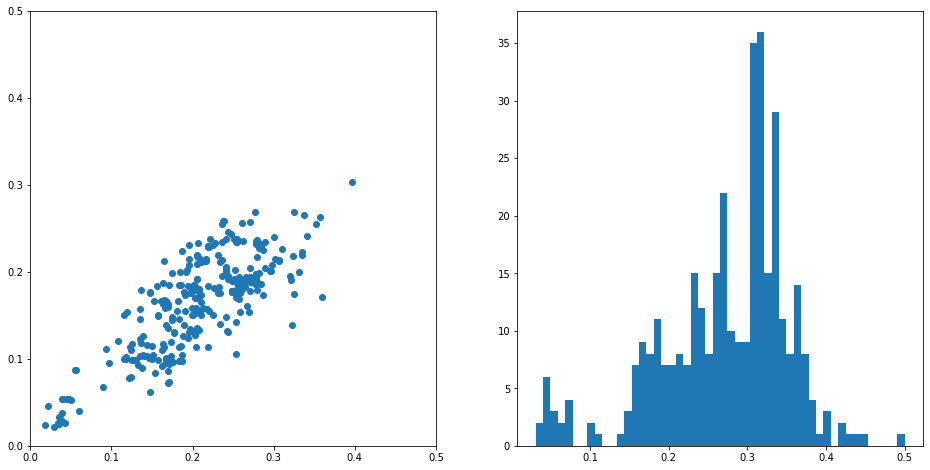

In [166]:
sp_fn = 'X51006389884'
df_sp = df[df['sp1_idx']==sp_fn]

f, axs = plt.subplots(1, 2, figsize=(16,8))
axs[0].scatter(df_sp['norm_diff_avg'], df_sp['norm_diff_std'])
axs[0].set_ylim(ymin=0, ymax=0.5)
axs[0].set_xlim(xmin=0, xmax=0.5)
hs = axs[1].hist(df_sp['norm_avg_std'], bins=50)

In [167]:
hs

(array([ 2.,  6.,  3.,  2.,  4.,  0.,  0.,  2.,  1.,  0.,  0.,  1.,  3.,
         7.,  9.,  8., 11.,  7.,  7.,  8.,  7., 15., 12.,  8., 15., 22.,
        10.,  9.,  9., 35., 36., 15., 29., 11.,  8., 14.,  8.,  4.,  1.,
         3.,  0.,  2.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([0.03055413, 0.03993796, 0.04932178, 0.0587056 , 0.06808943,
        0.07747325, 0.08685708, 0.0962409 , 0.10562472, 0.11500855,
        0.12439237, 0.1337762 , 0.14316002, 0.15254384, 0.16192767,
        0.17131149, 0.18069532, 0.19007914, 0.19946296, 0.20884679,
        0.21823061, 0.22761444, 0.23699826, 0.24638208, 0.25576591,
        0.26514973, 0.27453356, 0.28391738, 0.2933012 , 0.30268503,
        0.31206885, 0.32145267, 0.3308365 , 0.34022032, 0.34960415,
        0.35898797, 0.36837179, 0.37775562, 0.38713944, 0.39652327,
        0.40590709, 0.41529091, 0.42467474, 0.43405856, 0.44344239,
        0.45282621, 0.46221003, 0.47159386, 0.48097768, 0.49036151,
        0.49974533]),
 <BarContainer

In [171]:
df_sp[df_sp['norm_avg_std']<0.15].sort_values('norm_avg_std')

,sp1_idx,sp2_idx,sp1_matched,sp2_matched,n_matched,n_shared_kw,n_kw_occur_sp1,n_kw_occur_sp2,norm_diff_avg,norm_diff_std,norm_avg_std
131364,X51006389884,X51006389888,"[65, 85, 75, 9, 90, 3, 11, 43, 71, 84, 89, 16,...","[78, 97, 88, 9, 102, 3, 11, 51, 84, 96, 101, 1...",59,44,69,71,0.018731,0.024140,0.030554
131697,X51006389884,X51008142038,"[85, 75, 9, 90, 3, 11, 71, 84, 89, 16, 62, 73,...","[49, 40, 9, 54, 3, 11, 36, 48, 53, 15, 32, 38,...",48,36,60,49,0.029087,0.021237,0.036015
131481,X51006389884,X51006619566,"[85, 75, 9, 90, 3, 11, 71, 84, 89, 16, 62, 73,...","[49, 41, 9, 54, 3, 11, 36, 48, 53, 17, 32, 38,...",47,36,60,48,0.034384,0.025786,0.042979
131480,X51006389884,X51006619563,"[85, 75, 9, 90, 3, 11, 71, 84, 89, 16, 62, 73,...","[48, 39, 9, 53, 3, 11, 35, 47, 52, 17, 31, 37,...",47,36,60,48,0.035618,0.024580,0.043276
131690,X51006389884,X51008128065,"[85, 75, 9, 90, 3, 11, 71, 84, 89, 16, 62, 73,...","[50, 41, 9, 55, 3, 11, 37, 49, 54, 17, 33, 39,...",47,36,60,47,0.039025,0.026829,0.047358
131672,X51006389884,X51008114266,"[65, 85, 75, 9, 90, 3, 11, 71, 84, 89, 16, 62,...","[38, 57, 48, 9, 62, 3, 11, 44, 56, 61, 17, 35,...",50,37,62,53,0.038481,0.028015,0.047598
131671,X51006389884,X51008114262,"[85, 75, 9, 90, 3, 11, 71, 84, 89, 16, 62, 73,...","[53, 43, 9, 58, 3, 11, 39, 52, 57, 17, 35, 41,...",48,36,63,49,0.039553,0.028049,0.048489
131511,X51006389884,X51006828217,"[65, 85, 75, 9, 90, 3, 11, 71, 84, 36, 89, 37,...","[43, 62, 53, 9, 67, 3, 11, 49, 61, 23, 66, 28,...",53,40,65,55,0.035391,0.033399,0.048662
131670,X51006389884,X51008114260,"[85, 75, 9, 90, 3, 11, 71, 84, 89, 16, 62, 73,...","[49, 40, 9, 54, 3, 11, 36, 48, 53, 17, 32, 38,...",47,37,64,48,0.043225,0.026477,0.050689
131476,X51006389884,X51006619496,"[85, 75, 9, 90, 3, 49, 11, 71, 84, 69, 89, 16,...","[75, 65, 9, 80, 3, 32, 11, 61, 74, 59, 79, 16,...",56,39,66,62,0.022213,0.046291,0.051344


0.05472833148826621
0.08731828047523672


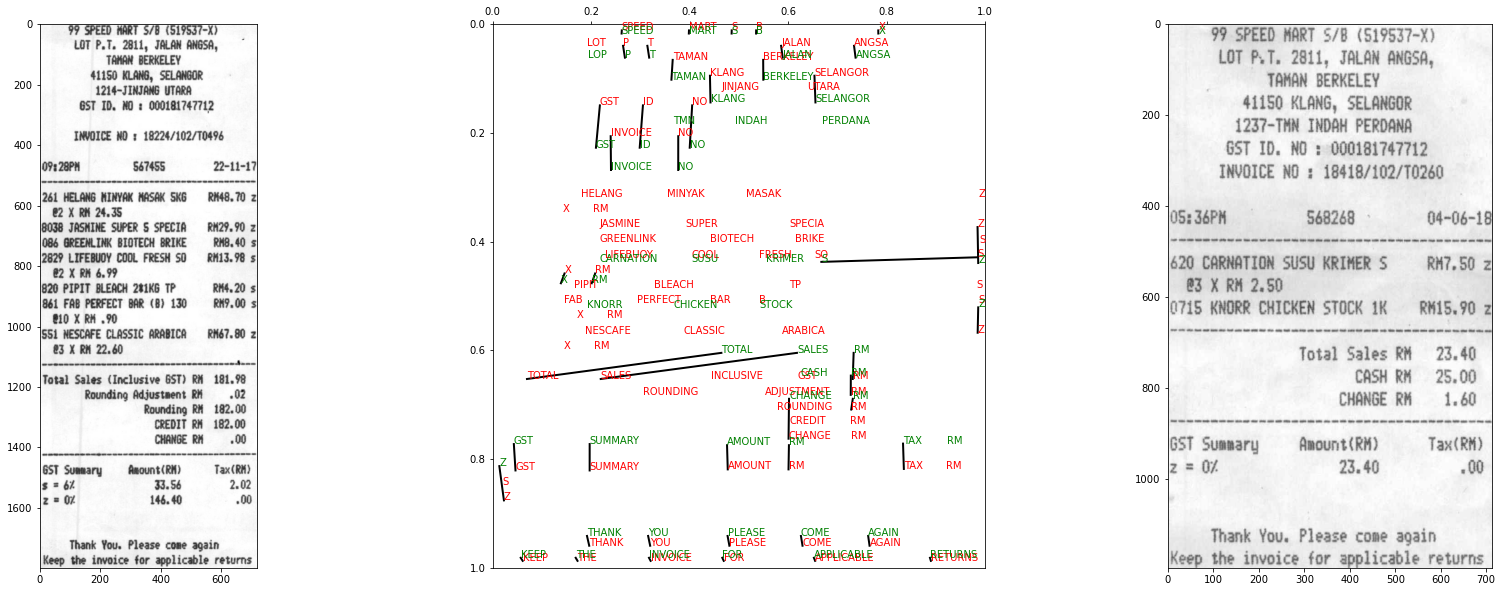

In [172]:
# show mapping
df_idx = 131673
sp1, sp2 = samples[df.loc[df_idx]['sp1_idx']], samples[df.loc[df_idx]['sp2_idx']]
sp1_mapping, sp2_mapping, n_shared_kw, n_kw_occur_sp1, n_kw_occur_sp2, norm_diff_avg, norm_diff_std = try_mapping_1(sp1, sp2)
print(norm_diff_avg)
print(norm_diff_std)
show_mapping(sp1, sp2, mapping=(sp1_mapping, sp2_mapping), imshow=True)

In [136]:
from importlib import reload
import util
from util import *
reload(util)
from util import *